## Pokemon DB :

Download the "pokedex.sqlite" db from : https://www.dropbox.com/s/dhcz0ryqoxeqqrf/pokedex.sqlite?dl=0

Try to explore and see what is in the DB:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
import sqlite3
con = sqlite3.connect("./pokedex.sqlite")
cur=con.cursor()

In [3]:
# Use this command below to see the list of tables in the DB
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
cur.fetchall()

[('conquest_move_displacements',),
 ('encounter_methods',),
 ('move_targets',),
 ('berry_firmness',),
 ('pokemon_move_methods',),
 ('conquest_warrior_stats',),
 ('item_flags',),
 ('item_fling_effects',),
 ('item_pockets',),
 ('move_damage_classes',),
 ('evolution_triggers',),
 ('contest_effects',),
 ('pokemon_habitats',),
 ('genders',),
 ('super_contest_effects',),
 ('conquest_move_ranges',),
 ('move_meta_categories',),
 ('egg_groups',),
 ('conquest_episodes',),
 ('contest_types',),
 ('move_flags',),
 ('conquest_warrior_archetypes',),
 ('conquest_stats',),
 ('encounter_conditions',),
 ('pokemon_colors',),
 ('move_battle_styles',),
 ('pal_park_areas',),
 ('move_effects',),
 ('regions',),
 ('conquest_move_effects',),
 ('growth_rates',),
 ('languages',),
 ('pokeathlon_stats',),
 ('conquest_warrior_skills',),
 ('pokemon_shapes',),
 ('move_meta_ailments',),
 ('stats',),
 ('conquest_warrior_skill_names',),
 ('conquest_move_displacement_prose',),
 ('pokemon_color_names',),
 ('encounter_condit

### Types :

In [4]:
cur.execute("SELECT * FROM sqlite_master")
cur.fetchall()

[('table',
  'conquest_move_displacements',
  'conquest_move_displacements',
  2,
  'CREATE TABLE conquest_move_displacements (\n\tid INTEGER NOT NULL, \n\tidentifier VARCHAR(18) NOT NULL, \n\taffects_target BOOLEAN NOT NULL, \n\tPRIMARY KEY (id), \n\tCHECK (affects_target IN (0, 1))\n)'),
 ('table',
  'encounter_methods',
  'encounter_methods',
  3,
  'CREATE TABLE encounter_methods (\n\tid INTEGER NOT NULL, \n\tidentifier VARCHAR(16) NOT NULL, \n\t"order" INTEGER NOT NULL, \n\tPRIMARY KEY (id), \n\tUNIQUE (identifier), \n\tUNIQUE ("order")\n)'),
 ('index',
  'sqlite_autoindex_encounter_methods_1',
  'encounter_methods',
  4,
  None),
 ('index',
  'sqlite_autoindex_encounter_methods_2',
  'encounter_methods',
  5,
  None),
 ('table',
  'move_targets',
  'move_targets',
  6,
  'CREATE TABLE move_targets (\n\tid INTEGER NOT NULL, \n\tidentifier VARCHAR(32) NOT NULL, \n\tPRIMARY KEY (id)\n)'),
 ('table',
  'berry_firmness',
  'berry_firmness',
  7,
  'CREATE TABLE berry_firmness (\n\tid 

In [5]:
cur.execute("SELECT name FROM sqlite_master Where type = 'table';")
cur.fetchall()

[('conquest_move_displacements',),
 ('encounter_methods',),
 ('move_targets',),
 ('berry_firmness',),
 ('pokemon_move_methods',),
 ('conquest_warrior_stats',),
 ('item_flags',),
 ('item_fling_effects',),
 ('item_pockets',),
 ('move_damage_classes',),
 ('evolution_triggers',),
 ('contest_effects',),
 ('pokemon_habitats',),
 ('genders',),
 ('super_contest_effects',),
 ('conquest_move_ranges',),
 ('move_meta_categories',),
 ('egg_groups',),
 ('conquest_episodes',),
 ('contest_types',),
 ('move_flags',),
 ('conquest_warrior_archetypes',),
 ('conquest_stats',),
 ('encounter_conditions',),
 ('pokemon_colors',),
 ('move_battle_styles',),
 ('pal_park_areas',),
 ('move_effects',),
 ('regions',),
 ('conquest_move_effects',),
 ('growth_rates',),
 ('languages',),
 ('pokeathlon_stats',),
 ('conquest_warrior_skills',),
 ('pokemon_shapes',),
 ('move_meta_ailments',),
 ('stats',),
 ('conquest_warrior_skill_names',),
 ('conquest_move_displacement_prose',),
 ('pokemon_color_names',),
 ('encounter_condit

### Gen 1 moves :

In [6]:
SQL_command="""SELECT move_names.name, type_names.name
FROM move_names JOIN moves ON moves.id = move_names.move_id
JOIN type_names ON moves.type_id = type_names.type_id WHERE move_names.local_language_id == 9 
AND moves.generation_id == 1
AND type_names.local_language_id == 9
ORDER BY type_names.type_id
;"""
cur.execute(SQL_command)
cur.fetchall()

[('Pound', 'Normal'),
 ('DoubleSlap', 'Normal'),
 ('Comet Punch', 'Normal'),
 ('Mega Punch', 'Normal'),
 ('Pay Day', 'Normal'),
 ('Scratch', 'Normal'),
 ('ViceGrip', 'Normal'),
 ('Guillotine', 'Normal'),
 ('Razor Wind', 'Normal'),
 ('Swords Dance', 'Normal'),
 ('Cut', 'Normal'),
 ('Whirlwind', 'Normal'),
 ('Bind', 'Normal'),
 ('Slam', 'Normal'),
 ('Stomp', 'Normal'),
 ('Mega Kick', 'Normal'),
 ('Headbutt', 'Normal'),
 ('Horn Attack', 'Normal'),
 ('Fury Attack', 'Normal'),
 ('Horn Drill', 'Normal'),
 ('Tackle', 'Normal'),
 ('Body Slam', 'Normal'),
 ('Wrap', 'Normal'),
 ('Take Down', 'Normal'),
 ('Thrash', 'Normal'),
 ('Double-Edge', 'Normal'),
 ('Tail Whip', 'Normal'),
 ('Leer', 'Normal'),
 ('Growl', 'Normal'),
 ('Roar', 'Normal'),
 ('Sing', 'Normal'),
 ('Supersonic', 'Normal'),
 ('SonicBoom', 'Normal'),
 ('Disable', 'Normal'),
 ('Hyper Beam', 'Normal'),
 ('Strength', 'Normal'),
 ('Growth', 'Normal'),
 ('Quick Attack', 'Normal'),
 ('Rage', 'Normal'),
 ('Mimic', 'Normal'),
 ('Screech', '

## back to Pandas, some data exploration :

Download another Pokemon dataset from here :https://www.dropbox.com/s/ms0tixxeflq1toc/Pokemon.csv?dl=0 
Lets explore:

In [9]:
Pokemon = pd.read_csv('Pokemon.csv')
Pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [10]:
Pokemon.rename(columns={'#': 'id'}, inplace=True)
Pokemon.columns = Pokemon.columns.str.lower()
Pokemon.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [11]:
Pokemon[Pokemon.duplicated(['name'], keep=False)]
Pokemon.head()
# use df.duplicated('id', keep=False) filter

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [12]:
Pokemon.drop_duplicates('id', keep = 'first', inplace=True)

In [11]:
Pokemon.head(10)

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False


In [12]:
Pokemon['type 2']

0      Poison
1      Poison
2      Poison
4         NaN
5         NaN
6      Flying
9         NaN
10        NaN
11        NaN
13        NaN
14        NaN
15     Flying
16     Poison
17     Poison
18     Poison
20     Flying
21     Flying
22     Flying
24        NaN
25        NaN
26     Flying
27     Flying
28        NaN
29        NaN
30        NaN
31        NaN
32        NaN
33        NaN
34        NaN
35        NaN
        ...  
762       NaN
763       NaN
764    Normal
765    Normal
766    Dragon
767    Dragon
768       Ice
769       Ice
770       NaN
771    Flying
772     Fairy
773     Fairy
774       NaN
775       NaN
776       NaN
777     Fairy
778     Grass
779     Grass
780     Grass
784     Grass
788       NaN
789       NaN
790    Dragon
791    Dragon
792       NaN
793    Flying
794    Ground
795     Fairy
797     Ghost
799     Water
Name: type 2, Length: 721, dtype: object

In [13]:
Pokemon['type 2'].fillna(value='No_type', inplace=True)
Pokemon['type 2'].head()

0     Poison
1     Poison
2     Poison
4    No_type
5    No_type
Name: type 2, dtype: object

In [14]:
#The dataset contains both information regarding the identity and statistics of each Pokemon species; therefore, 
#let's separate these two observational units into separate tables: pokedex and statistics.
# create pokedex with these columns: ['id', 'name', 'type 1', 'type 2', 'generation', 'legendary']
pokedex = Pokemon[['id', 'name', 'type 1', 'type 2', 'generation', 'legendary']].copy()
pokedex.head()

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
4,4,Charmander,Fire,No_type,1,False
5,5,Charmeleon,Fire,No_type,1,False


In [16]:
# create poke_statistics with these columns:['id', 'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed','total']
poke_statistics = Pokemon[['id', 'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed','total']].copy()
poke_statistics.head()

,id,hp,attack,defense,sp. atk,sp. def,speed,total
0,1,45,49,49,65,65,45,318
1,2,60,62,63,80,80,60,405
2,3,80,82,83,100,100,80,525
4,4,39,52,43,60,50,65,309
5,5,58,64,58,80,65,80,405


In [17]:
poke_statistics.describe()

,id,hp,attack,defense,sp. atk,sp. def,speed,total
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,68.380028,75.124827,70.697642,68.848821,69.180305,65.714286,417.945908
std,208.27906,25.848272,29.070335,29.194941,28.898590,26.899364,27.277920,109.663671
min,1.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,180.000000
25%,181.00000,50.000000,54.000000,50.000000,45.000000,50.000000,45.000000,320.000000
50%,361.00000,65.000000,75.000000,65.000000,65.000000,65.000000,65.000000,424.000000
75%,541.00000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,499.000000
max,721.00000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,720.000000


### Now we have a clean dataset. 
### Lets see : How are Pokemon numbers distributed across generations?

In [17]:
pokedex.groupby('generation').describe()

id                                                       
            count   mean        std    min     25%    50%     75%    max
generation                                                              
1           151.0   76.0  43.734045    1.0   38.50   76.0  113.50  151.0
2           100.0  201.5  29.011492  152.0  176.75  201.5  226.25  251.0
3           135.0  319.0  39.115214  252.0  285.50  319.0  352.50  386.0
4           107.0  440.0  31.032241  387.0  413.50  440.0  466.50  493.0
5           156.0  571.5  45.177428  494.0  532.75  571.5  610.25  649.0
6            72.0  685.5  20.928450  650.0  667.75  685.5  703.25  721.0

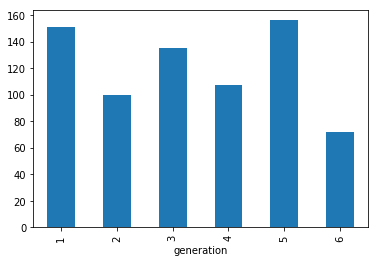

In [18]:
%matplotlib inline
pokedex.groupby('generation')['id'].count().plot(kind = 'bar')

### Try Seaborn:

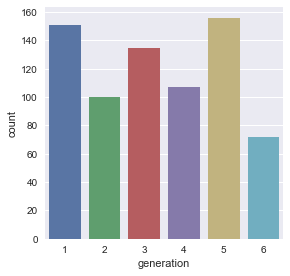

In [19]:
sb.set()
sb.factorplot(kind='count', data=pokedex, x='generation')

#### There doesn't seem to be a trend across generations; however, even-numbered generations introduced fewer Pokemon as compared to the odd-numbered generations.

#### Let's dig a bit deeper and examine the distribution of primary types of Pokemon across generations.

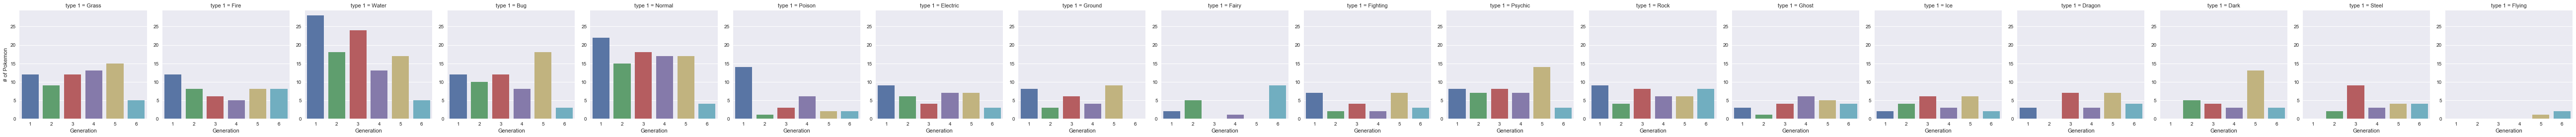

In [20]:
sb.factorplot(kind='count', 
              data=pokedex, 
              col='type 1',
              x='generation').set_axis_labels("Generation", "# of Pokemon")

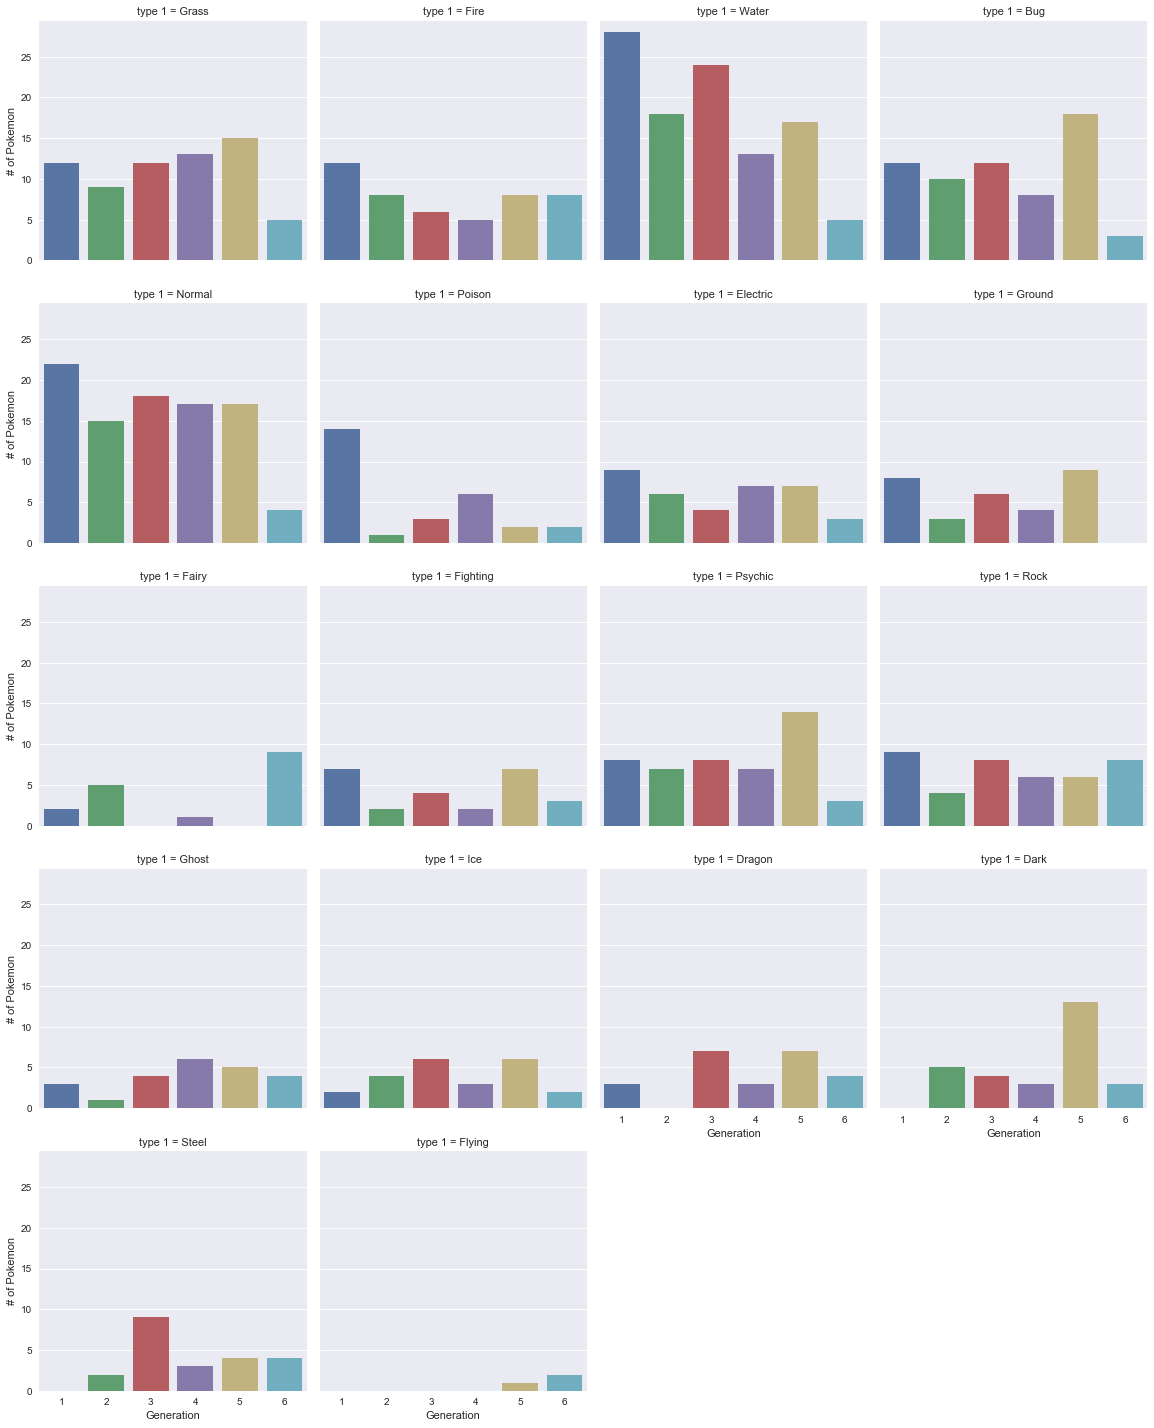

In [21]:
sb.factorplot(kind='count', 
              data=pokedex, 
              col='type 1',
              x='generation', col_wrap = 4).set_axis_labels("Generation", "# of Pokemon")

In [22]:
# Water, Bug and Normal are the most common types of pokemon accross all generations
# Generation 5 had a sudden increase in Dark and Psychic types of pokemon (as base type)
# Steel and Dark was introduced in Generation 2, with Steel having a sudden spike in Genration 3
# There are no ground type 1 pokemon in Genration 6
# Some of the more common types in first few generations became less popular in the later generations Specifically the water and normal types 

### Are there unique primary or secondary Pokemon types, or if they simply share the same ones.

In [23]:
unique_type1 =  np.setdiff1d(pokedex['type 1'], pokedex['type 2'])
unique_type1

array([], dtype=object)

In [24]:
unique_type2 =  np.setdiff1d(pokedex['type 2'], pokedex['type 1'])
unique_type2

array(['No_type'], dtype=object)

In [25]:
### There are no unique primary or secondary types

In [26]:
print ('number of pokemon in type 1:',len(pokedex.groupby('type 1')))
print ('number of pokemon in type 2:',len(pokedex.groupby('type 2')))

number of pokemon in type 1: 18
number of pokemon in type 2: 19


### What are the most common types of Pokemon?

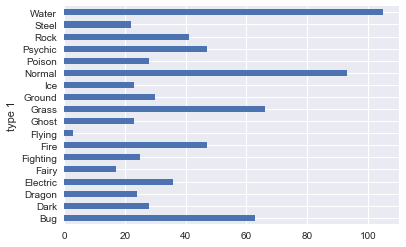

In [27]:
pokedex.groupby('type 1')['id'].count().plot(kind='barh')

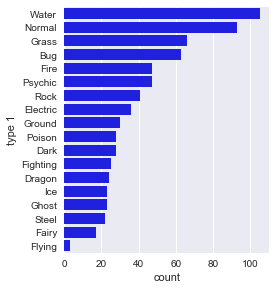

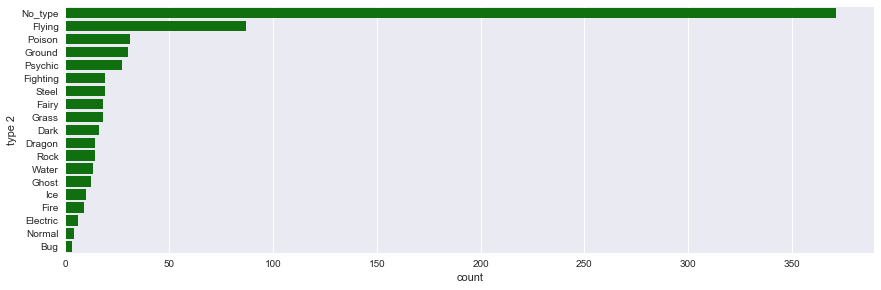

In [28]:
# Now try Seaborn:
sb.factorplot(data=pokedex,
               y='type 1',
                kind='count',
                 order = pokedex['type 1'].value_counts().index,
                 color='blue',
                     aspect=1)

sb.factorplot(data=pokedex,
               y='type 2',
                kind='count',
                 order = pokedex['type 2'].value_counts().index,
                 color='green',
                     aspect=3.1)

In [29]:
pokedex['id'].count()
# around half of the pokemon don't have a secondary type
# flying is significantly more popular as a secondary type than a primarty type. 
# on the reverse bug is way more popular as a primary type as opposed to a secondary type. 

721

### But we can not say which type maps into which type !

Lets create a heatmap !

In [30]:
dual_types = pokedex[pokedex['type 2'] != 'No_type']
dual_types.head()

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
6,6,Charizard,Fire,Flying,1,False
15,12,Butterfree,Bug,Flying,1,False


In [31]:
dual_types.groupby(['type 1', 'type 2']).size().unstack().shape

(18, 18)

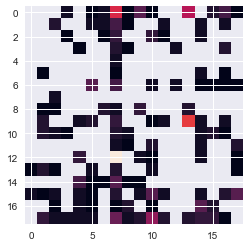

In [32]:
plt.imshow(dual_types.groupby(['type 1', 'type 2']).size().unstack().values)
plt.show()

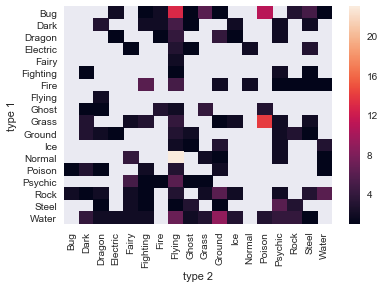

In [33]:
sb.set()
sb.heatmap(dual_types.groupby(['type 1', 'type 2']).size().unstack())

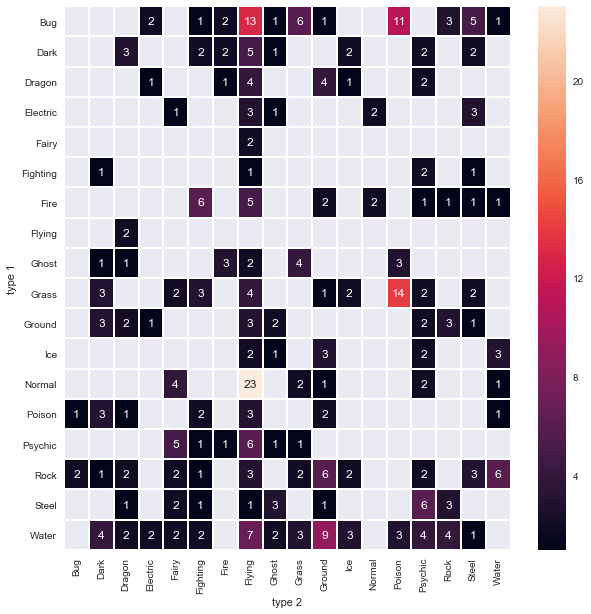

In [34]:
sb.set()
plt.figure(figsize=(10, 10))
sb.heatmap(dual_types.groupby(['type 1', 'type 2']).size().unstack(),
              linewidths=1,
              annot=True)

In [35]:
# There's a lot of Normal type 1 and flying type 2 Pokemon
# Every type 1 type has a pokemon with a flying type 2 
# Grass and poison is a common archetype, as well as bug and flying, and bug and poison

### Are any of the statistics correlated?

In [36]:
from scipy import stats

In [37]:
poke_statistics.head()

,id,hp,attack,defense,sp. atk,sp. def,speed,total
0,1,45,49,49,65,65,45,318
1,2,60,62,63,80,80,60,405
2,3,80,82,83,100,100,80,525
4,4,39,52,43,60,50,65,309
5,5,58,64,58,80,65,80,405


In [38]:
stats.pearsonr(poke_statistics.hp,poke_statistics.speed)

(0.17003077974523076, 4.408713982440297e-06)

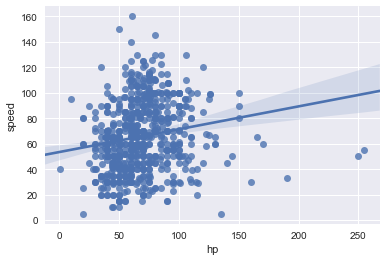

In [128]:
sb.set()
sb.regplot(poke_statistics.hp,poke_statistics.speed, fit_reg = True)

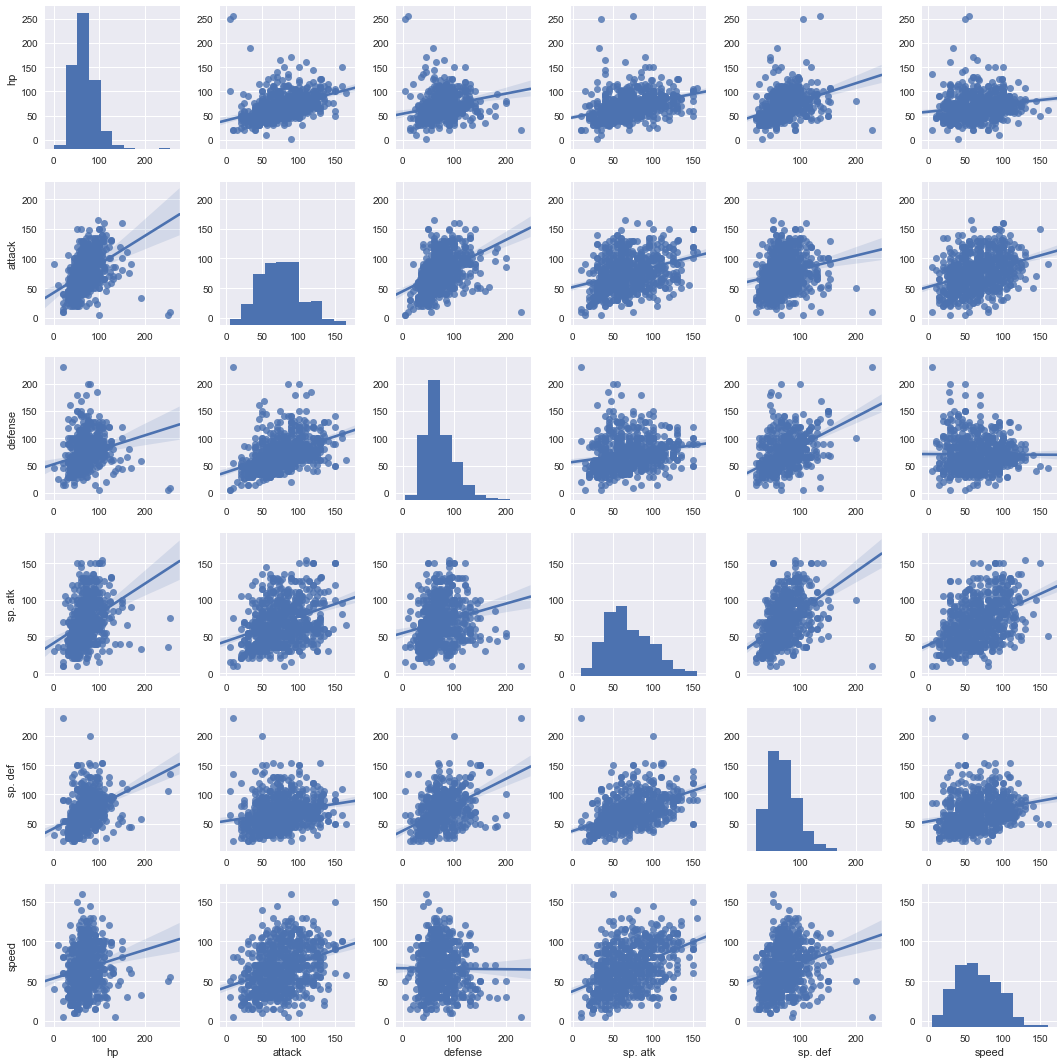

In [40]:
sb.set()
sb.pairplot(poke_statistics.loc[:,'hp':'speed'], kind = 'reg')

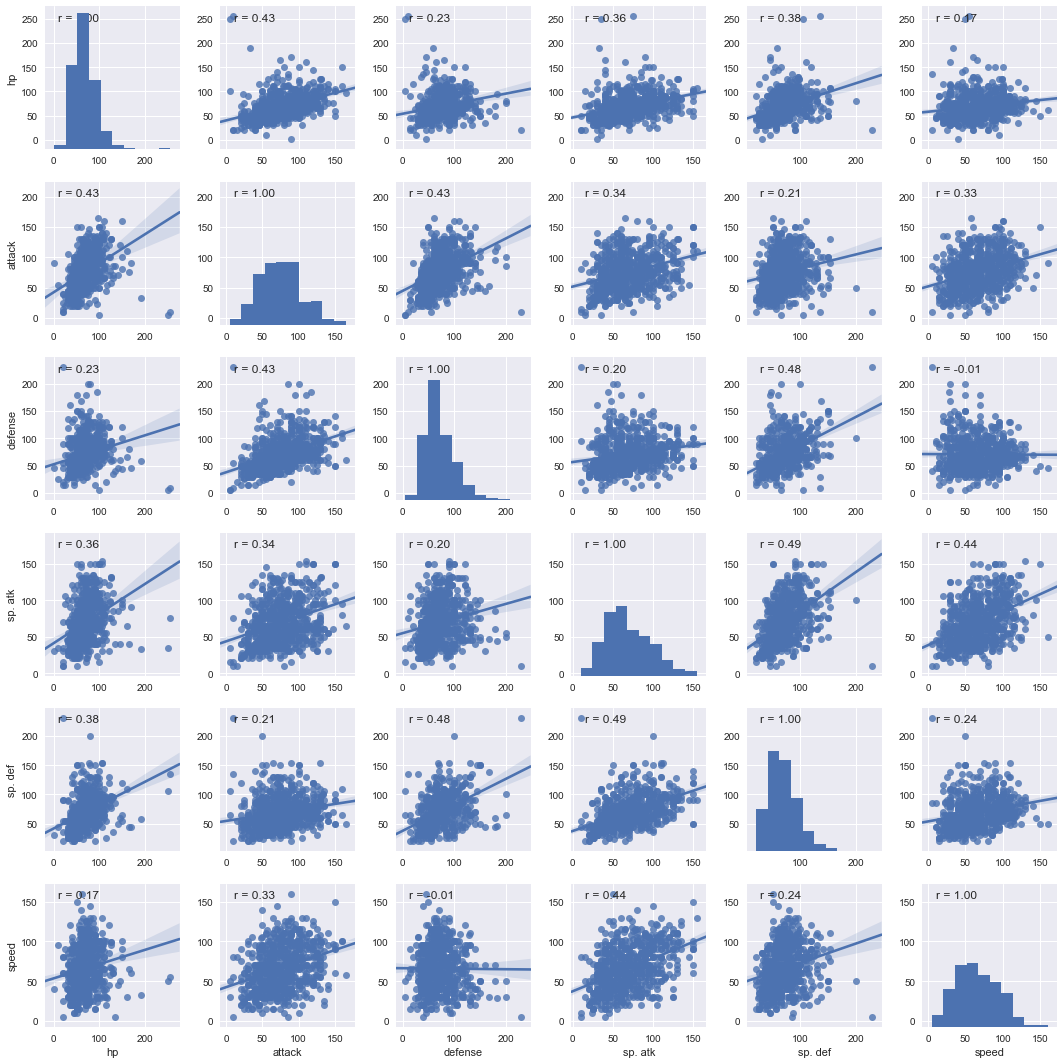

In [41]:
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

plot = sb.pairplot(poke_statistics.loc[:,'hp':'speed'], kind = 'reg')
plot.map(corrfunc)

In [42]:
# From my observations - the highest correlation are between special attack and special defence
# special defence and defence is highly correlated as well, also special attack and speed
# data is not strongly correlated, indicating that there is no 'best choice' of pokemon types
# the data is also not normally distributed (histograms). the data tends to peak at low levels and trails to higher levels
# this indicates that there are many weaker and average pokemon, but only a select few really strong pokemon

In [43]:
Pokemon.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,No_type,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,No_type,405,58,64,58,80,65,80,1,False


### What are the strongest and weakest Pokemon species?

In [44]:
Pokemon.loc[Pokemon['total'].idxmax()]

id                493
name           Arceus
type 1         Normal
type 2        No_type
total             720
hp                120
attack            120
defense           120
sp. atk           120
sp. def           120
speed             120
generation          4
legendary        True
Name: 552, dtype: object

In [45]:
Pokemon.loc[Pokemon['total'].idxmin()]

id                191
name          Sunkern
type 1          Grass
type 2        No_type
total             180
hp                 30
attack             30
defense            30
sp. atk            30
sp. def            30
speed              30
generation          2
legendary       False
Name: 206, dtype: object

In [46]:
# I used total because I felt that it would return the highest total stats of all pokemon
# which is not a bad indicator however...
# I think it could be baised if one pokemon has an abnormally high stat category in one statistic.

In [76]:
z_score = stats.zscore(poke_statistics.loc[:,'hp':'speed'])
z_score

array([[-0.9051382 , -0.89930034, -0.74371464, -0.13327615, -0.15551324,
        -0.75990639],
       [-0.32442576, -0.45179864, -0.2638466 ,  0.38614064,  0.40250788,
        -0.20962935],
       [ 0.4498575 ,  0.23666552,  0.42167916,  1.07869637,  1.14653603,
         0.52407337],
       ..., 
       [-0.71156739,  0.85628327,  2.71819048,  1.07869637,  3.00660642,
        -0.57648071],
       [ 0.4498575 ,  1.20051535, -0.36667547,  2.8100857 ,  2.26257827,
         0.15722201],
       [ 0.4498575 ,  1.20051535,  1.68990183,  2.11752997,  0.77452196,
         0.15722201]])

In [48]:
# Define a new column, strength, as the sum of the z-scores of each statistic—the higher this value, 
# the stronger the Pokemon.

In [49]:
z_sum = z_score.sum(axis=1)
z_sum

array([ -3.59684896,  -0.46105182,   3.85750796,  -3.92897937,
        -0.46533357,   4.16487629,  -3.75155419,  -0.47543295,
         4.02913388,  -7.96307169,  -7.61933826,  -0.77870888,
        -7.97248222,  -7.62874879,  -0.7536813 ,  -5.98793853,
        -2.43930539,   2.24610576,  -5.927122  ,  -0.15690819,
        -5.58807816,   0.86757214,  -4.68477553,   0.71342421,
        -3.51254473,   2.40912236,  -4.3180537 ,   1.08014603,
        -5.11819528,  -1.87927544,   3.1555305 ,  -5.2035399 ,
        -1.89606748,   3.11300225,  -3.3409543 ,   2.4035233 ,
        -4.23743444,   3.18153404,  -5.11630319,   0.80131334,
        -6.183137  ,   1.37434262,  -3.56076719,  -0.86441901,
         2.53735302,  -4.85371801,  -0.53549886,  -4.01302972,
         1.18735547,  -5.51654128,  -0.46461941,  -4.55287938,
         0.84532035,  -3.52545456,   2.95238511,  -4.06890171,
         1.32929802,  -2.45853026,   4.91191944,  -4.2093819 ,
        -1.14998056,   3.32576772,  -3.87087055,  -0.63

In [50]:
z_sum = pd.DataFrame(z_sum)
z_sum.shape

(721, 1)

In [51]:
poke_statistics.set_index(pokedex.iloc[:,1], inplace = True)
poke_statistics.head()

,id,hp,attack,defense,sp. atk,sp. def,speed,total
name,,,,,,,,
Bulbasaur,1,45,49,49,65,65,45,318
Ivysaur,2,60,62,63,80,80,60,405
Venusaur,3,80,82,83,100,100,80,525
Charmander,4,39,52,43,60,50,65,309
Charmeleon,5,58,64,58,80,65,80,405


In [120]:
z_df = pd.concat([pd.DataFrame(z_score),z_sum],axis=1)
z_df.columns = [list(poke_statistics)[1:8]]
z_df.set_index(pokedex.iloc[:,1], inplace = True)
z_df.rename(columns={'total':'strength'}, inplace = True)
z_df.head()

,hp,attack,defense,sp. atk,sp. def,speed,strength
name,,,,,,,
Bulbasaur,-0.905138,-0.899300,-0.743715,-0.133276,-0.155513,-0.759906,-3.596849
Ivysaur,-0.324426,-0.451799,-0.263847,0.386141,0.402508,-0.209629,-0.461052
Venusaur,0.449857,0.236666,0.421679,1.078696,1.146536,0.524073,3.857508
Charmander,-1.137423,-0.796031,-0.949372,-0.306415,-0.713534,-0.026204,-3.928979
Charmeleon,-0.401854,-0.382952,-0.435228,0.386141,-0.155513,0.524073,-0.465334


In [150]:
z_df.describe()

,hp,attack,defense,sp. atk,sp. def,speed,strength
count,7.210000e+02,7.210000e+02,7.210000e+02,7.210000e+02,7.210000e+02,7.210000e+02,7.210000e+02
mean,1.539838e-16,7.822376e-17,-1.428969e-16,-2.026426e-16,8.669287e-17,2.140374e-16,6.196307e-16
std,1.000694e+00,1.000694e+00,1.000694e+00,1.000694e+00,1.000694e+00,1.000694e+00,3.935638e+00
min,-2.608561e+00,-2.413922e+00,-2.251871e+00,-2.037804e+00,-1.829577e+00,-2.227312e+00,-8.547151e+00
25%,-7.115674e-01,-7.271843e-01,-7.094383e-01,-8.258319e-01,-7.135344e-01,-7.599064e-01,-3.536714e+00
50%,-1.308549e-01,-4.296933e-03,-1.952940e-01,-1.332762e-01,-1.555132e-01,-2.620367e-02,1.977260e-01
75%,4.498575e-01,6.841672e-01,4.902317e-01,7.324185e-01,5.885149e-01,7.074990e-01,2.853863e+00
max,7.224836e+00,3.093792e+00,5.460294e+00,2.948597e+00,5.982719e+00,3.458884e+00,1.088637e+01


In [190]:
z_df['strength'].idxmax()
# Arceus is still the strongest pokemon after Z-scores are taken into effect 

'Arceus'

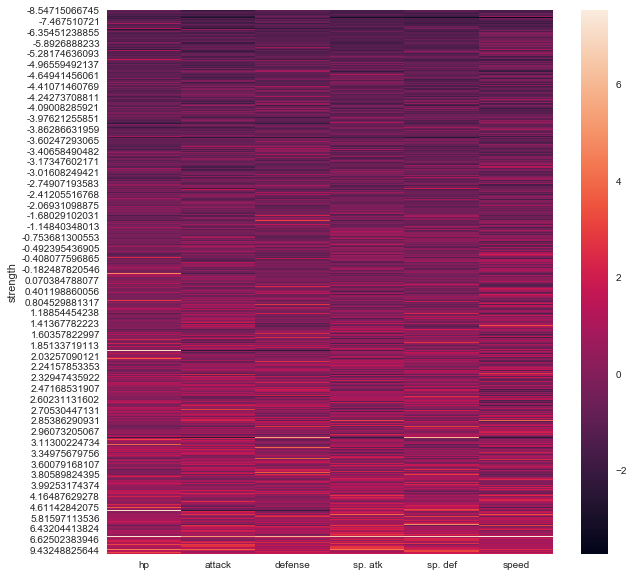

In [187]:
sb.set()
plt.figure(figsize=(10, 10))
sb.heatmap(z_df.groupby(['strength']).sum())

In [152]:
# what this heatmap says, is that there is a very strong correlation between their strength score and stats
# meaning that chances are if a pokemon is strong, all their stats are strong
# that weaker pokemon are represented with weaker stats and stronger Pokemon vice-versa
# that Pokemon stats do not vary greatly. One pokemon will not be likely to have a very high or very low 
# stat category compared with their overall strength score. 
# if pokemon stats varied more from their z-score that the colours on this graph will have more inconsistencies
# with the colours. 

In [194]:
z_df.loc[:,"hp":"speed"].head()

,hp,attack,defense,sp. atk,sp. def,speed
name,,,,,,
Bulbasaur,-0.905138,-0.899300,-0.743715,-0.133276,-0.155513,-0.759906
Ivysaur,-0.324426,-0.451799,-0.263847,0.386141,0.402508,-0.209629
Venusaur,0.449857,0.236666,0.421679,1.078696,1.146536,0.524073
Charmander,-1.137423,-0.796031,-0.949372,-0.306415,-0.713534,-0.026204
Charmeleon,-0.401854,-0.382952,-0.435228,0.386141,-0.155513,0.524073


### Are any of the statistics correlated?

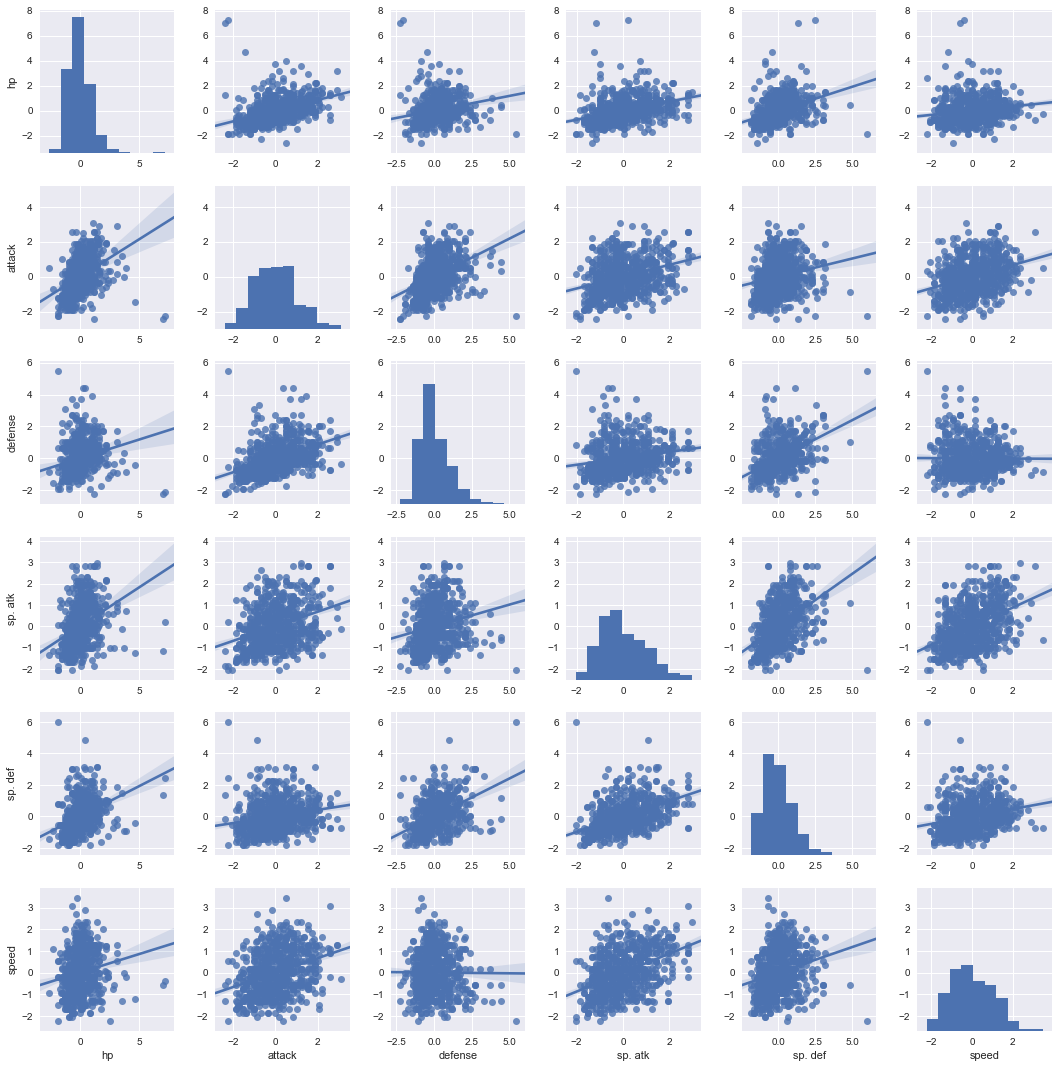

In [197]:
sb.set()
sb.pairplot(z_df.loc[:,'hp':'speed'], kind = 'reg')

In [198]:
# if you run the pairplot with the z-scores you get the exact same result as the 

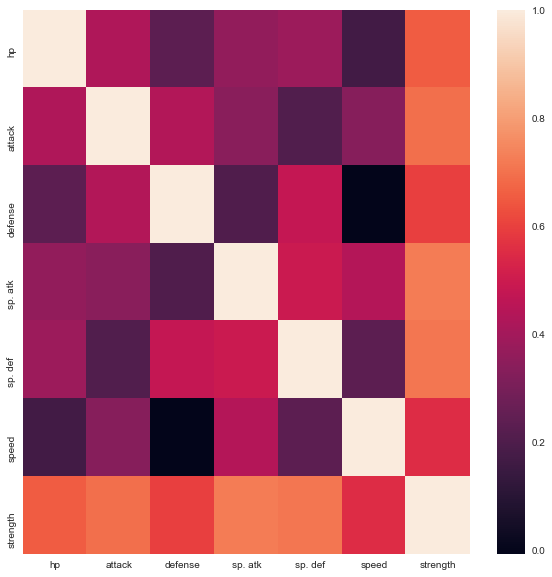

In [201]:
sb.set()
plt.figure(figsize=(10, 10))
sb.heatmap(z_df.corr())

In [ ]:
# From looking at the strenght column on this corplot, special attack and special defence is more correlated 
# with strenght, meaning that the higher these statistics are the greater the overall stats of the pokemon
# speed and defence, on the other hand, has less off an effect on the overall strenght of a pokemon